## First look at raw KPF data. Checking headers


9 Nov 2022

This notebook is ready to examine raw data.

In [55]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [57]:
data_dir = "/Users/hisaacson/Dropbox/code/Intro-2-Spectra/data/kpf/"
##fname    = 'KPF_220316_175000.fits' # old data
# fname    = 'KP.20230103.71033.03.fits' # 3 jan 2023. raw file
#fname    = 'KP.20230626.20936.91.fits' # 26 Jan 2023 L0 file
fname    = 'KP.20240926.50902.99.fits' # 26 Sep 2024 L0 file, FAST READ MODE
hdu1     = fits.open(data_dir + fname)
# raw_g1  = hdu1[1].data /1e6 *5.2 # FAST READ has four amplifiers, regular read mode 2
# raw_g2  = hdu1[2].data /1e6 *5.2 # 1e6 is a conversion from what the detector reads to dn. Gain is 5.2
raw_g1  = hdu1[1].data / 2**16 *5.2 # FAST READ has four amplifiers, regular read mode 2
raw_g2  = hdu1[2].data / 2**16 *5.2 # 1e6 is a conversion from what the detector reads to dn. Gain is 5.2

# raw_g3  = hdu1[3].data 
# raw_g4  = hdu1[4].data 
# 
kpf_hd   = hdu1[0].header # Each data file also has a header.
hdu1.info()

Filename: /Users/hisaacson/Dropbox/code/Intro-2-Spectra/data/kpf/KP.20240926.50902.99.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     438   ()      
  1  GREEN_AMP1    1 ImageHDU        13   (2094, 2070)   float32   
  2  GREEN_AMP2    1 ImageHDU        13   (2094, 2070)   float32   
  3  GREEN_AMP3    1 ImageHDU        13   (2094, 2070)   float32   
  4  GREEN_AMP4    1 ImageHDU        13   (2094, 2070)   float32   
  5  RED_AMP1      1 ImageHDU        13   (2094, 2070)   float32   
  6  RED_AMP2      1 ImageHDU        13   (2094, 2070)   float32   
  7  RED_AMP3      1 ImageHDU        13   (2094, 2070)   float32   
  8  RED_AMP4      1 ImageHDU        13   (2094, 2070)   float32   
  9  EXPMETER_SCI    1 BinTableHDU    849   24R x 420C   [23A, 23A, 23A, 23A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

In [58]:
# Print out primary header
# print(repr(kpf_hd))


In [59]:
print("KPF Target name:",kpf_hd['TARGNAME'])

KPF Target name: 219134


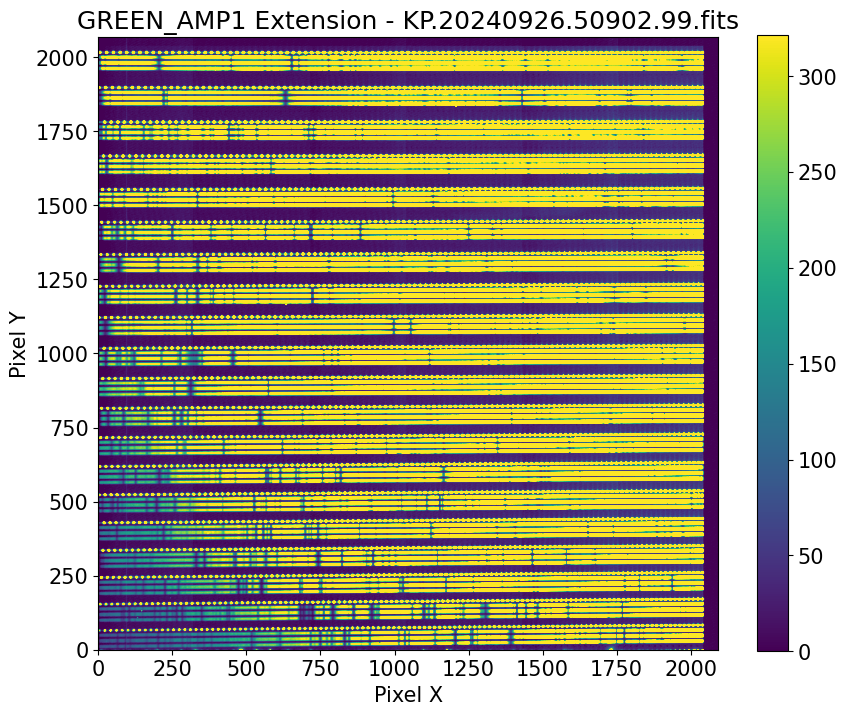

In [60]:
# Calculate the bias using the mean of the last 10 columns of raw_g1
bias_value = raw_g1[:, -10:].mean()

# Remove the bias value from the entire raw_g1 array
raw_g1_bias_removed = raw_g1 - bias_value

# Plotting GREEN_AMP1 extension
plt.figure(figsize=(10, 8))
plt.imshow(raw_g1_bias_removed, cmap='viridis', origin='lower',vmin=0,vmax=np.median(raw_g1_bias_removed)*5)
plt.colorbar()
plt.title('GREEN_AMP1 Extension - KP.20240926.50902.99.fits')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

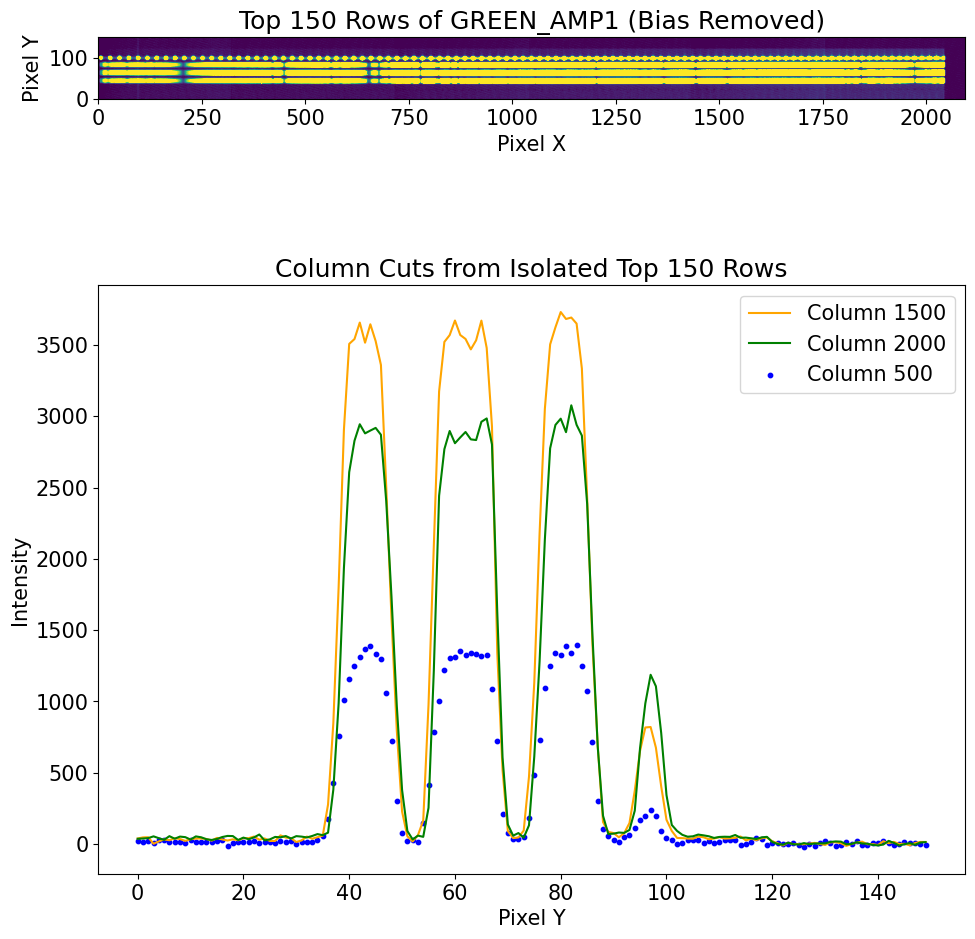

In [61]:
# Isolate the top 150 rows from raw_g1_bias_removed
isolated_section = raw_g1_bias_removed[-150:, :]

# Create a new plot with subplots for column cuts
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Plot the isolated section
cax = ax[0].imshow(isolated_section, cmap='viridis', origin='lower', 
                   vmin=0, vmax=np.median(isolated_section) * 10)
# fig.colorbar(cax, ax=ax[0])
ax[0].set_title('Top 150 Rows of GREEN_AMP1 (Bias Removed)')
ax[0].set_xlabel('Pixel X')
ax[0].set_ylabel('Pixel Y')

# Add column cuts by averaging over small sections of columns
column_cut1 = isolated_section[:, 500]  # Example cut around column 500
column_cut2 = isolated_section[:, 1500]  # Example cut around column 1000
column_cut3 = isolated_section[:, 2000]  # Example cut around column 1500

# Plot column cuts on the second subplot
ax[1].scatter(range(len(column_cut1)), column_cut1, label='Column 500', color='blue', s=10)
ax[1].plot(column_cut2, label='Column 1500', color='orange')
ax[1].plot(column_cut3, label='Column 2000', color='green')
ax[1].set_title('Column Cuts from Isolated Top 150 Rows')
ax[1].set_xlabel('Pixel Y')
ax[1].set_ylabel('Intensity')
ax[1].legend()

plt.tight_layout()
plt.show()

In [62]:
# Sum the pixels in column_cut3 that have values above 20
pixels_above_20 = column_cut3[column_cut3 > 20].sum()   / 3 
pixels_in_orders = column_cut3[30:90].sum() / 3
snr_avg = np.sqrt(pixels_above_20)
snr_avg2 = np.sqrt(pixels_in_orders)
# Output the result
print(f"Sum of pixels in column_cut3 with values above 20: {pixels_above_20}")
print(f"Sum of pixels in column_cut3 with values above 20 divided by 3: {pixels_above_20}")
print(f"Average SNR per pixel: {snr_avg}")
print(f"Average SNR per pixel: {snr_avg2}")



Sum of pixels in column_cut3 with values above 20: 33969.60590807064
Sum of pixels in column_cut3 with values above 20 divided by 3: 33969.60590807064
Average SNR per pixel: 184.30845316498818
Average SNR per pixel: 176.91283603370675


In [ ]:
# TEST


In [72]:
# # Open the master flat for that night:
# #fname    = 'kpf_20230624_master_flat.fits' # 24 Jan 2023 L0 file
# #fname    = 'kpf_20230623_master_flat.fits'# 23 Jan 2023 L0 file
# fname    = 'kpf_20230620_master_flat.fits # 20 Jan 2023 L0 file
# hdu2     = fits.open(data_dir + fname)
# raw_flat_g  = hdu2[3].data 
# hdu2.info()
# print(np.min(hdu2[3].data ),np.median(hdu2[3].data),np.max(hdu2[3].data ))

Filename: /Users/hisaacson/code/Intro-2-Spectra/data/kpf/kpf_20230624_master_flat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     335   ()      
  1  RECEIPT       1 BinTableHDU     29   2R x 10C   [26A, 6A, 7A, 40A, 3A, 9A, 1A, 21A, 40A, 4A]   
  2  CONFIG        1 BinTableHDU     13   0R x 2C   [D, D]   
  3  GREEN_CCD     1 ImageHDU        20   (4080, 4080)   float64   
  4  RED_CCD       1 ImageHDU        22   (4080, 4080)   float64   
  5  GREEN_CCD_UNC    1 ImageHDU         9   (4080, 4080)   float32   
  6  GREEN_CCD_CNT    1 ImageHDU         9   (4080, 4080)   int32   
  7  GREEN_CCD_STACK    1 ImageHDU         9   (4080, 4080)   float32   
  8  GREEN_CCD_LAMP    1 ImageHDU         9   (4080, 4080)   float32   
  9  RED_CCD_UNC    1 ImageHDU         9   (4080, 4080)   float32   
 10  RED_CCD_CNT    1 ImageHDU         9   (4080, 4080)   int32   
 11  RED_CCD_STACK    1 ImageHDU         9   (4080, 4080)   float32   
 12  RED_

In [ ]:
kpf_20230623_master_flat.fits

In [ ]:
# Next show a magnification of one order identifying the sky, science and calibration fibers.

In [ ]:
# Next show red chip. same thing.